In [4]:
# Load training data
import random 

from dataset import read_mathqapython

from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('EleutherAI/gpt-neo-125M')

import matplotlib.pyplot as plt

# Training Set

In [2]:
data = read_mathqapython('mathqapython_train.json')

# Print a few representative instances
idxs = random.sample(range(len(data)), 3)

for i in idxs: 
    instance = data[i]
    print(instance.text + '\n' + instance.code + '\n')

# a number is doubled and 9 is added . if resultant is trebled , it becomes 57 . what is that number n0 = 9.0 n1 = 57.0
n0 = 9.0
n1 = 57.0
t0 = n0 * 3.0
t1 = 2.0 * 3.0
t2 = n1 - t0
answer = t2 / t1

# by how much does the larger root of the equation 2 q ^ 2 + 5 q = 12 exceed the smaller root ? n0 = 2.0 n1 = 2.0 n2 = 5.0 n3 = 12.0
import math
n0 = 2.0
n1 = 2.0
n2 = 5.0
n3 = 12.0
t0 = n0 * n3
t1 = n0 * n0
t2 = n2**min(n0, 5)
t3 = t0 * 4.0
t4 = t3 + t2
t5 = math.sqrt(max(0, t4))
t6 = n2 + t5
t7 = n2 - t5
t8 = t6 / t1
t9 = t7 / t1
answer = t8 - t9

# a carpenter worked alone for 1 day on a job that would take him 7 more days to finish . he and another carpenter completed the job in 4 more days . how many days would it have taken the second carpenter to do the complete job working alone ? n0 = 1.0 n1 = 7.0 n2 = 4.0
n0 = 1.0
n1 = 7.0
n2 = 4.0
t0 = n0 + n1
t1 = n2 * t0
answer = t1 / 2.0



### Text + code lengths

In [10]:
# Look at lengths of combined text + code
full_lengths = [(len(tokenizer.encode(x.text + '\n' + x.code)), i) for i, x in enumerate(data)]

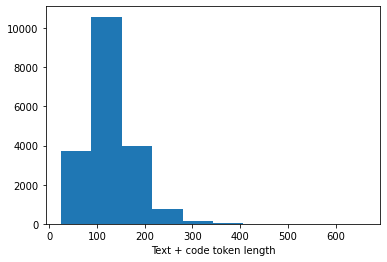

In [12]:
plt.hist([t[0] for t in full_lengths])
plt.xlabel('Text + code token length')
plt.show()

In [15]:
# Top 10 longest text + codes 
sorted_full_lengths = sorted(full_lengths, key = lambda t: -t[0])

print("Length of 10 longest text+codes")
for i in range(10): 
    print(sorted_full_lengths[i][0])

Length of 10 longest text+codes
662
614
527
523
486
470
465
412
411
398


In [16]:
# Out of curiosity, show the longest text + code
i = sorted_full_lengths[0][1]
x = data[i]

print(x.text + '\n' + x.code)

# shipment - - - no . of defective chips / shipment - - - total chips in shipment s 1 - - - - - - - - - - - - - - - - - - - - - - 2 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 5000 s 2 - - - - - - - - - - - - - - - - - - - - - - 4 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 12000 s 3 - - - - - - - - - - - - - - - - - - - - - - 2 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 15000 s 4 - - - - - - - - - - - - - - - - - - - - - - 4 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 16000 a computer chip manufacturer expects the ratio of the number of defective chips to the total number of chips in all future shipments to equal the corresponding ratio for shipments s 1 , s 2 , s 3 , and s 4 combined , as shown in the table above . what ’ s the expected number of defective chips in a shipment of 60000 chips ? n0 = 1.0 n1 = 2.0 n2 = 5000.0 n3 = 

# Val + Test Set

In [18]:
evals = read_mathqapython("mathqapython_dev.json") + read_mathqapython("mathqapython_test.json")

### Code lengths

In [29]:
code_lengths = [(len(tokenizer.encode(x.code)), i) for i, x in enumerate(evals)]

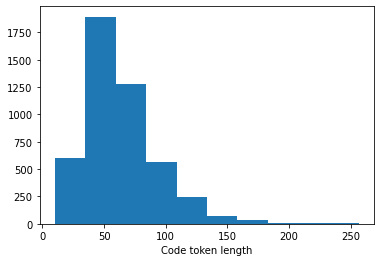

In [30]:
plt.hist([t[0] for t in code_lengths])
plt.xlabel('Code token length')
plt.show()

In [31]:
# Top 10 longest codes 
sorted_code_lengths = sorted(code_lengths, key = lambda t: -t[0])

print("Length of 10 longest text+codes")
for i in range(10): 
    print(sorted_code_lengths[i][0])

Length of 10 longest text+codes
257
253
253
251
234
222
222
221
215
211


In [35]:
# Out of curiosity, show the longest code
idx = sorted_code_lengths[0][1]
ex = evals[idx]

print(ex.text + '\n' + ex.code)
len(tokenizer.encode(ex.code))

# assume that f ( 1 ) = 0 and f ( m + n ) = f ( m ) + f ( n ) + 4 ( 9 mn - 1 ) . for all natural numbers ( integers > 0 ) m and n . what is the value of f ( 17 ) ? n0 = 1.0 n1 = 0.0 n2 = 4.0 n3 = 9.0 n4 = 1.0 n5 = 0.0 n6 = 17.0
n0 = 1.0
n1 = 0.0
n2 = 4.0
n3 = 9.0
n4 = 1.0
n5 = 0.0
n6 = 17.0
t0 = 1.0 + 4.0
t1 = 2.0 * 4.0
t2 = n2 * 10.0
t3 = n6 * 4.0
t4 = t2 + 3.0
t5 = n3 + t3
t6 = n2 * t1
t7 = t0 * 100.0
t8 = t6 + t6
t9 = t6 + 3.0
t10 = t4 + 100.0
t11 = t5 - 2.0
t12 = t7 + t11
t13 = n2 * t9
t14 = n2 * t10
t15 = t8 + t13
t16 = t12 * 4.0
t17 = t15 + t15
t18 = t17 + t14
t19 = t18 + t18
t20 = t19 + t16
answer = t20 + t14


257